# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

      Problem statement:
      E news Express, an online portal targets to increase the subscribers.
      Executives opinion is, there is a decline in monthly subscribers compared to last year.
      The reason could be current web page is not designed well to keep the users engaged and therefore make a decision to subscribe.
      So, a new landing page is developed, that has a new outline & more relevant content shown compared to the old page.

      Objective:
      Our focus is to test the effectiveness of the new landing page in getting new subscribers.
      Provided the information below, we need to answer few business questions.
      *   Do the users spend more time on the new landing page than on the existing landing page?
      *   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
      *   Does the converted status depend on the preferred language?
      *   Is the time spent on the new page the same for the different language users?

      Data:
      *   Sample space - 100
      *   Sample1 - Control group:
      n1=50
      *   Sample2 - treatment group:
      n2=50
      *   Level of significance - 5%























## Import all the necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

In [ ]:
#Access to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/E-news Express Project/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# returns last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#shape - to get number of rows and columns
df.shape

(100, 6)

In [ ]:
# Statistical summary
df.groupby('group')['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30
treatment,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71


In [ ]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
#Check for duplicates
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


In [ ]:
# number of numerical and categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### **Data Insights:**


*   Dataset has 100 rows and 6 columns
*   There are 2 numerical columns and 4 categorical columns
*   There are no null values or duplicate values
*   Average of old page(Control) group is 4.5 where as for new(treatment) group is 6.2




### Univariate Analysis

In [1]:
# Numerical column - Timespent
sns.histplot(data=df,x='time_spent_on_the_page');

NameError: name 'sns' is not defined

In [ ]:
#Categorical column - group
sns.countplot(x ='group', data = df);

In [ ]:
#Categorical column - landing page
sns.countplot(x ='landing_page', data = df);

In [ ]:
#Categorical column - converted
sns.countplot(x ='converted', data = df);

In [ ]:
#Categorical column - language_preferred
sns.countplot(x ='language_preferred', data = df);

### Bivariate Analysis

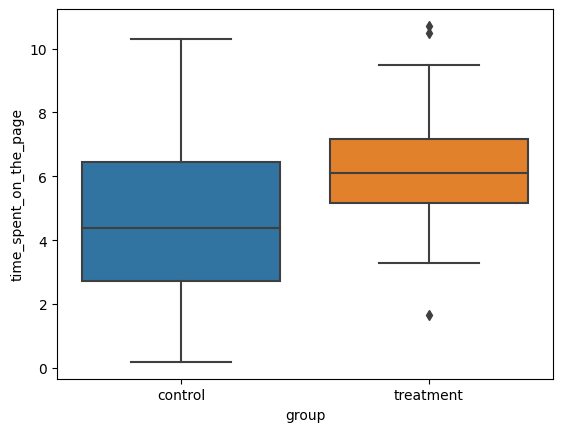

In [ ]:
#Categorical vs Numerical data
#group vs time
sns.boxplot(x='group',y='time_spent_on_the_page',data=df);

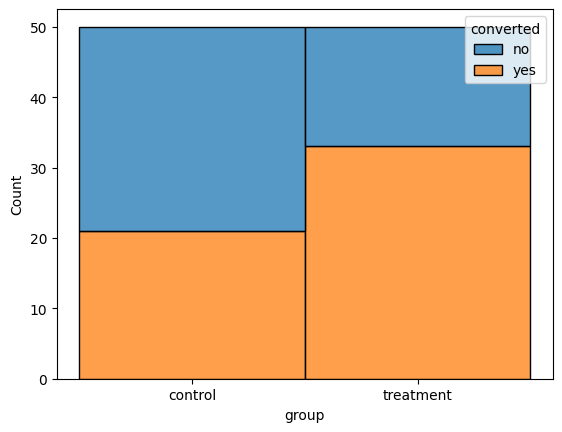

In [ ]:
  #Categorical vs Categorical
  #group and converted
  sns.histplot(binwidth=0.5, x="group", hue="converted", data=df, stat="count", multiple="stack");

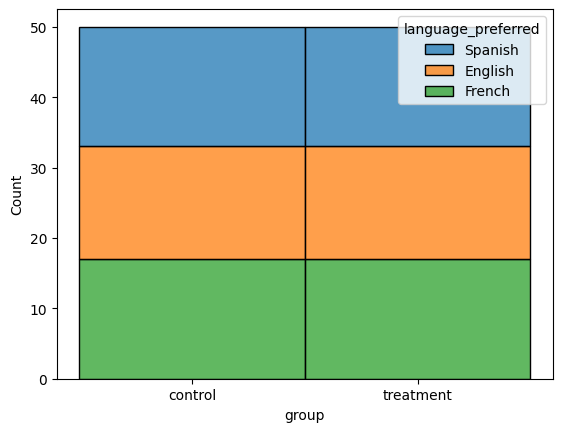

In [ ]:
  #Categorical vs Categorical
  #group and language_preferred
  sns.histplot(binwidth=0.5, x="group", hue="language_preferred", data=df, stat="count", multiple="stack");

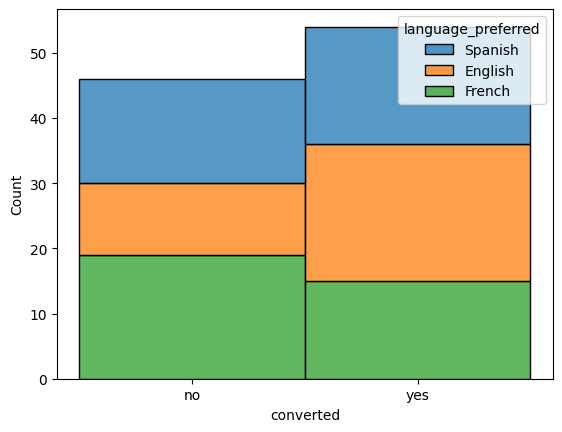

In [ ]:
  #Categorical vs Categorical
  #converted and language_preferred
  sns.histplot(binwidth=0.5, x="converted", hue="language_preferred", data=df, stat="count", multiple="stack");

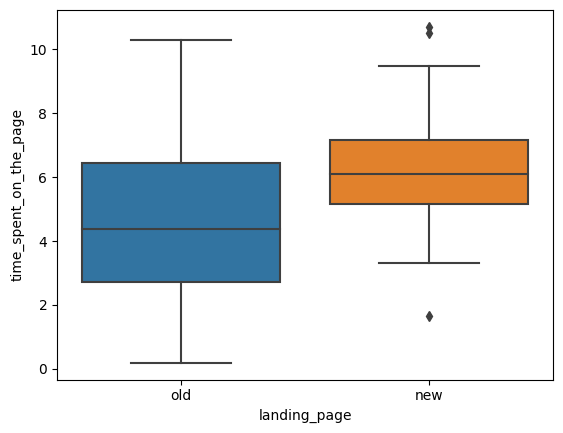

In [ ]:
#Categorical vs Numerical data
#page vs time
sns.boxplot(x='landing_page',y='time_spent_on_the_page',data=df);

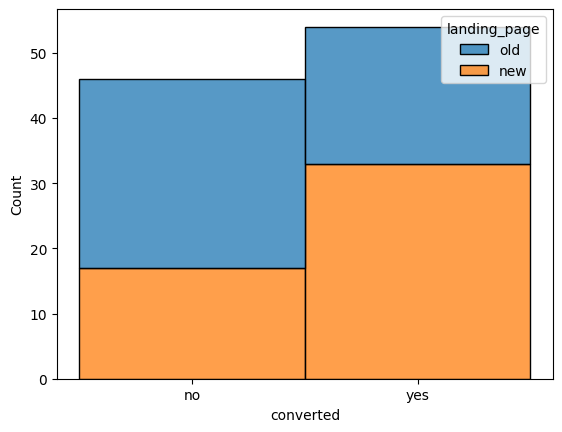

In [ ]:
  #Categorical vs Categorical
  #converted and page
  sns.histplot(binwidth=0.5, x="converted", hue="landing_page", data=df, stat="count", multiple="stack");

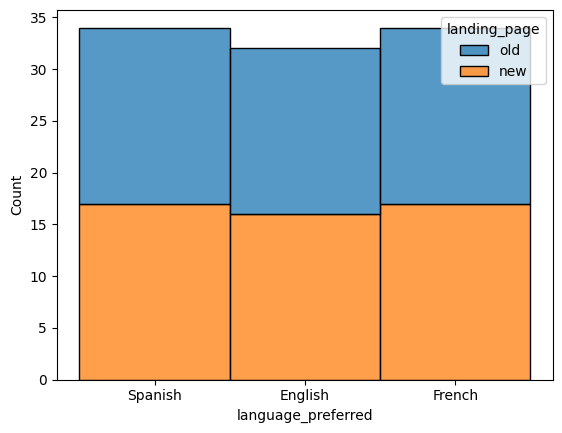

In [ ]:
  #Categorical vs Categorical
  #language and page
  sns.histplot(binwidth=0.5, x="language_preferred", hue="landing_page", data=df, stat="count", multiple="stack");

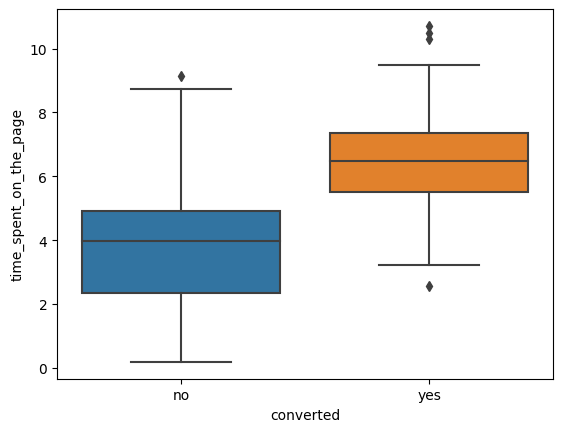

In [ ]:
#Categorical vs Numerical data
#conversion vs time
sns.boxplot(x='converted',y='time_spent_on_the_page',data=df);

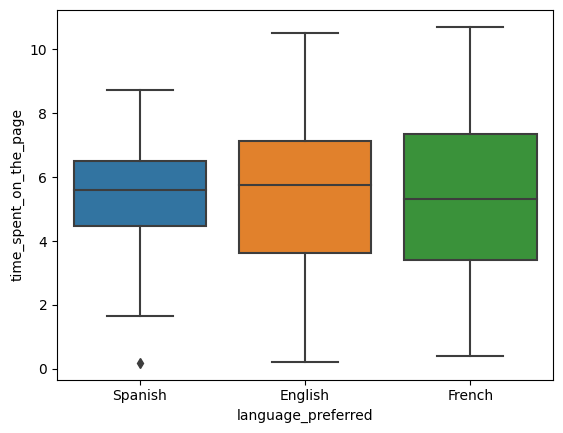

In [ ]:
#Categorical vs Numerical data
#language vs time
sns.boxplot(x='language_preferred',y='time_spent_on_the_page',data=df);

####**Observations on individual variables:**



*   Time spent is normally distributed
*   Users spend 0-11 hours in the page, maximum of 4-7 hours
*   Both the groups Control and Treatment has same sample count, n=50
*   That says, 50 users are given old page and the next 50 users are given new page
*   Number of users getting converted is higher than the users not converted
*   User distribution is same for French and Spanish, little low for English


####**Relationship between variables:**


*   Treatment group has higher average time spent in the page than Control group
*   Treatment group has higher conversion rate
*   That infers Time spent and conversion is directly proportional
*   Both groups have equal number of language users
*   Language has no effect in conversion
*   In Converted users, English language users are more than Spanish or French
*   French users spend more time in the page than English and Spanish users












## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

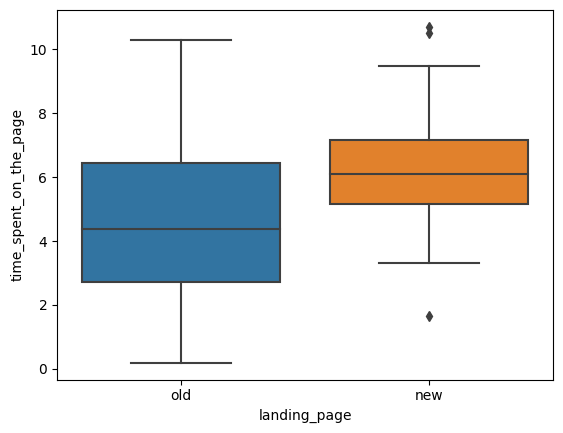

In [ ]:
# Time vs landing page
sns.boxplot(x='landing_page',y='time_spent_on_the_page',data=df);

### Step 1: Define the null and alternate hypotheses

H0: Time spent by users in new landing page is equal to the old page

HA: Time spent by users in new landing page is higher than the old landing page

### Step 2: Select Appropriate test



*   This is a comparison of Means
*   Standard deviation is unknown
*   This is a comparison between two sample means from two different populations
*   We may use 2 sample t-test for this scenario










### Step 3: Decide the significance level

level of significance = 0.05

### Step 4: Collect and prepare data

In [ ]:
#time spent on old page
time_oldpage = df[df.landing_page=='old']
time_oldpage

#time spent on new page
time_newpage = df[df.landing_page=='new']
#time_newpage


### Step 5: Calculate the p-value

In [ ]:
stats.ttest_ind(time_newpage['time_spent_on_the_page'],time_oldpage['time_spent_on_the_page'],equal_var="false",alternative='greater')

TtestResult(statistic=3.7867702694199856, pvalue=0.0001316123528095005, df=98.0)

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
pvalue = 0.0001316123528095005
if pvalue < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference



Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that time spent by users in new landing page is higher than the old landing page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

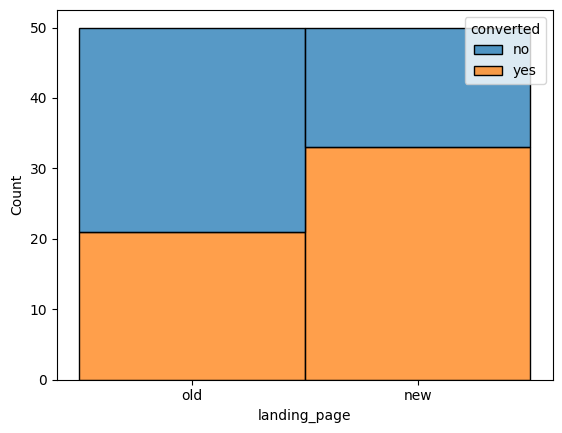

In [ ]:
#Visual analysis
sns.histplot(binwidth=0.5, x="landing_page", hue="converted", data=df, stat="count", multiple="stack");

Null and alternate hypotheses:
*   Ho: Conversion rate of new page is equal to the conversion rate of old page
*   HA: Conversion rate of new page is greater than the conversion rate of old page

Test:
2 sample z test for proportions

Reason:

We are comparing sample proportions from two different populations.

Level of significance:
alpha = 0.05

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

new_converted=time_newpage[time_newpage['converted']=='yes']
new_count=new_converted['converted'].value_counts()
print(new_count)

old_converted=time_oldpage[time_oldpage['converted']=='yes']
old_count=old_converted['converted'].value_counts()
print(old_count)


t_stat,p_value=proportions_ztest(new_count,100, value=0, alternative='larger')
print(p_value)


yes    33
Name: converted, dtype: int64
yes    21
Name: converted, dtype: int64
[1.12452567e-12]


In [ ]:
# print the conclusion based on p-value
pvalue = 1.12452567e-12
if pvalue < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.12452567e-12 is less than the level of significance, we reject the null hypothesis.


Conclusion:
Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for new page is greater than the conversion rate of old page.
i.e. proportion of users who visit the new landing page and get converted is greater than the old page

## 3. Is the conversion and preferred language are independent or related?

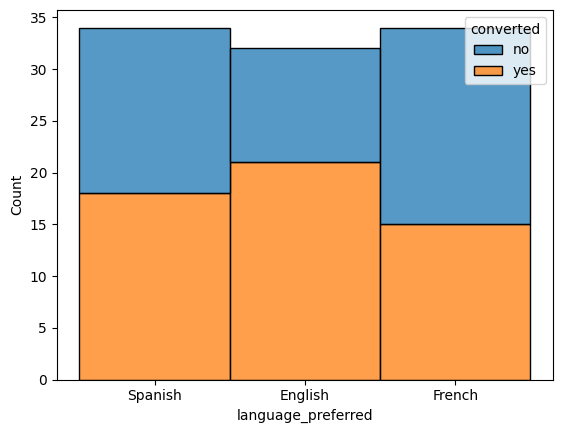

In [ ]:
#Visual analysis
sns.histplot(binwidth=0.5, x="language_preferred", hue="converted", data=df, stat="count", multiple="stack");

Hypothesis formation:

Null hypothesis - Conversion and Language preference are independent

Alternate hypothesis - Conversion and Language preference are dependent

Test type:

To test if two variables are related or not, we use Chi-square test for independance

Level of significance:

alpha = 0.05

In [ ]:
#Data prep - Contigency table
C_table = pd.crosstab(df['converted'], df['language_preferred'])
C_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(C_table)
p

0.21298887487543447

In [ ]:
# print the conclusion based on p-value
pvalue = 0.21298887487543447
if pvalue < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


Conclusion:

Since the pvalue is way higher than 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that Language has no effect in conversion.

i.e. Language is independant of conversion

## 4. Is the time spent on the new page same for the different language users?

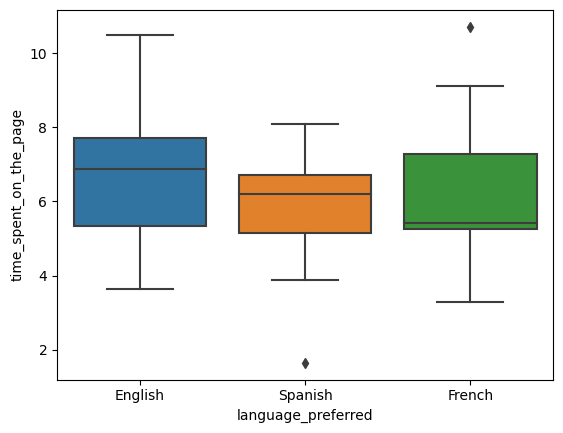

In [ ]:
#Visual analysis
sns.boxplot(x='language_preferred',y='time_spent_on_the_page',data=time_newpage);

#time_newpage.tail()

Hypothesis formation:

Null hypothesis - Average time spent in new page is equal for all languages

Alternate hypothesis - Average time spent in new page is NOT equal for all languages

Test type:

We are comparing Means of more than 2 populations. Hence, we may use ANOVA test

Assumptions for ANOVA:


*   Normal distribution - Verified by Shapiro-Wilk test
*   Equality in variance - Verified by Levene's test

Assumption-1:Shapiro-Wilk test:

H0 = Normal distribution

HA = NOT Normal distribution



In [ ]:
#Validate assumption-1 - Normal distribution
from scipy.stats import shapiro

shapiro(time_newpage['time_spent_on_the_page'])

ShapiroResult(statistic=0.9857664704322815, pvalue=0.8040016293525696)

In [ ]:
# print the conclusion based on p-value
pval=0.8040016293525696
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


Assumption-1, Normal distribution holds good.

Assumption-2: Levene's test

H0: All Variances are equal

HA: All variances are NOT equal

In [ ]:
#Validate assumption-2 - Levene's test
from scipy.stats import levene

eng = time_newpage[time_newpage['language_preferred']=='English']
spanish = time_newpage[time_newpage['language_preferred']=='Spanish']
french = time_newpage[time_newpage['language_preferred']=='French']

w_stats, p_value = levene(eng['time_spent_on_the_page'], spanish['time_spent_on_the_page'],french['time_spent_on_the_page'],center='mean')

# print the conclusion based on p-value
pval=0.40838546485517824
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.40838546485517824 is greater than the level of significance, we fail to reject the null hypothesis.


Assumption-2 - All variances are equal is proved.

In [ ]:
#ANOVA
from scipy.stats import f_oneway

f_oneway(eng['time_spent_on_the_page'], spanish['time_spent_on_the_page'],french['time_spent_on_the_page'])

F_onewayResult(statistic=0.854399277000682, pvalue=0.43204138694325955)

In [ ]:
# print the conclusion based on p-value
pval=0.43204138694325955
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


Conclusion:

Since the pvalue is way higher than 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that Average time spent in new page is equal for all languages.

In [ ]:
#Just a crosscheck to compare the Means of all languages
eng.describe()

,user_id,time_spent_on_the_page
count,16.00000,16.00000
mean,546461.87500,6.66375
std,13.44061,1.98415
min,546443.00000,3.65000
25%,546451.75000,5.32750
50%,546460.50000,6.86500
75%,546470.00000,7.71250
max,546488.00000,10.50000


In [ ]:
spanish.describe()

,user_id,time_spent_on_the_page
count,17.000000,17.000000
mean,546473.647059,5.835294
std,14.330654,1.525656
min,546446.000000,1.650000
25%,546462.000000,5.150000
50%,546479.000000,6.200000
75%,546485.000000,6.700000
max,546492.000000,8.080000


In [ ]:
french.describe()

,user_id,time_spent_on_the_page
count,17.000000,17.000000
mean,546466.647059,6.196471
std,14.265085,1.933394
min,546445.000000,3.300000
25%,546454.000000,5.250000
50%,546470.000000,5.420000
75%,546477.000000,7.270000
max,546490.000000,10.710000


## Conclusion and Business Recommendations

Exploratory Data Analysis is performed on the dataset and the following questions are answered based on those insights.
  *   Do the users spend more time on the new landing page than on the existing landing page?

    Yes, time spent by users in new landing page is higher than the old landing page
  *   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

  Yes, proportion of users who visit the new landing page and get converted is greater than the old page

  *   Does the converted status depend on the preferred language?

    No, language is independant of conversion status

  *   Is the time spent on the new page the same for the different language users?

    Yes, average time spent in new page is equal for all languages.

___